In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


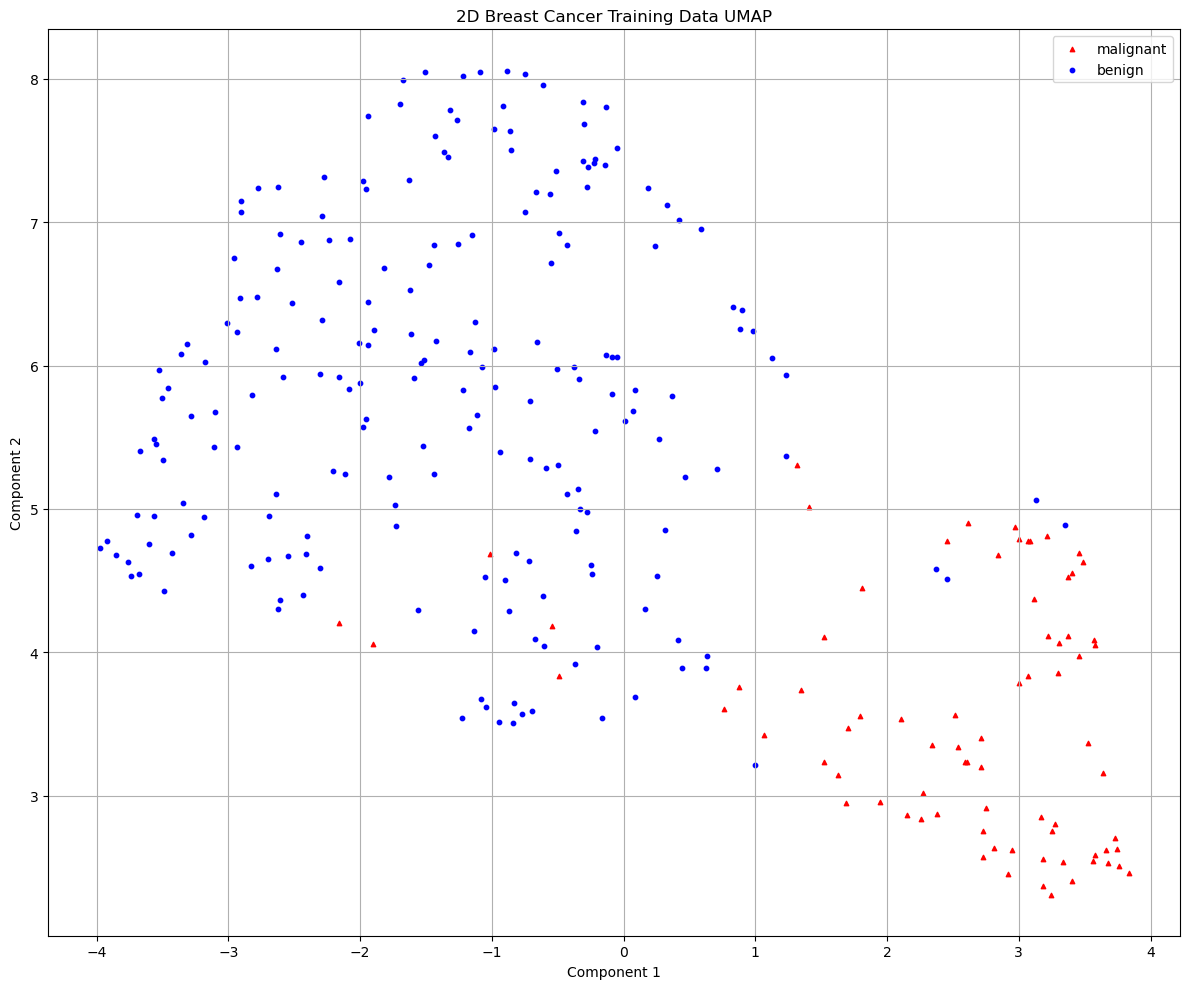

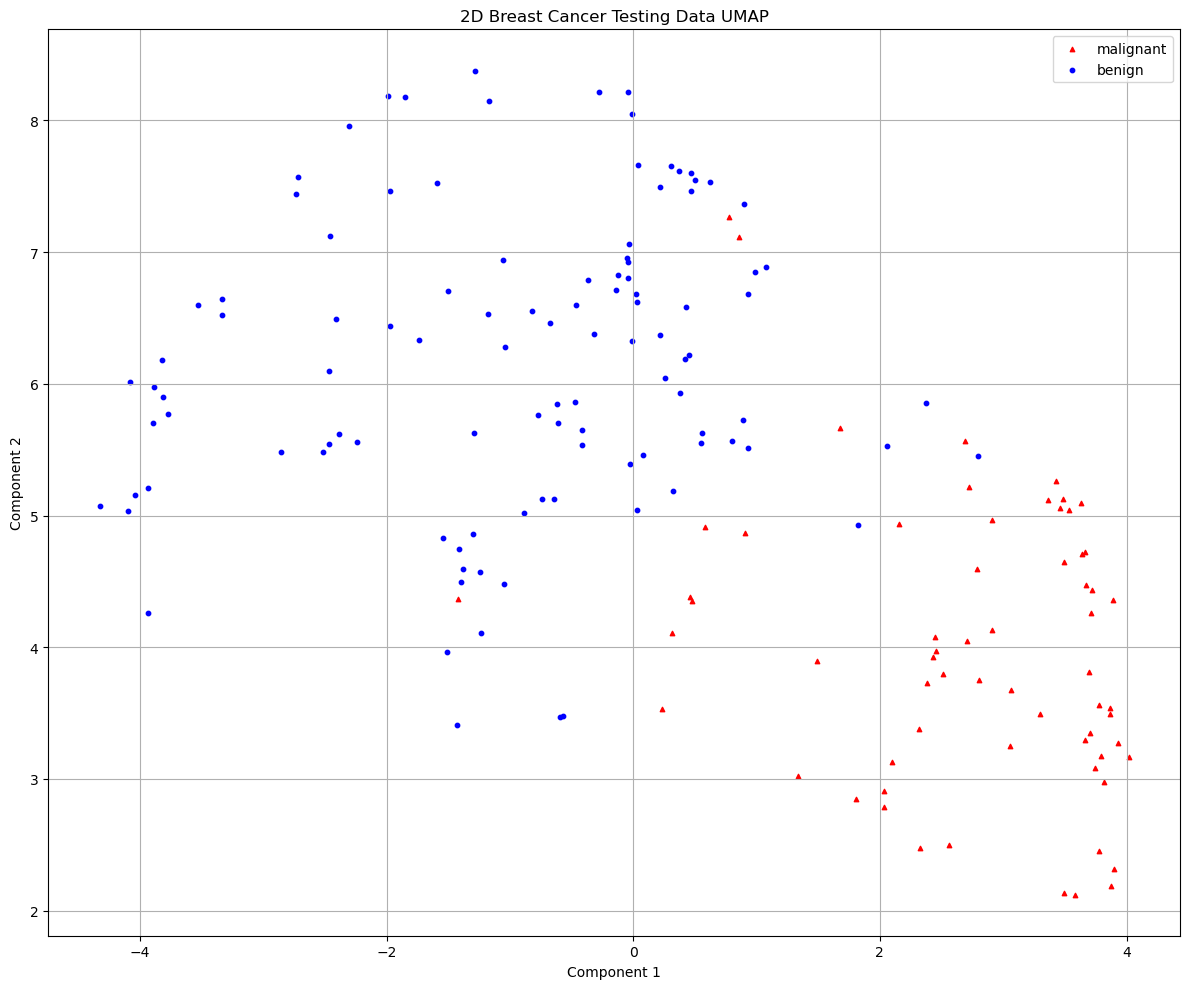

[I 2025-04-27 04:51:09,507] A new study created in memory with name: no-name-503cde04-6a2b-4f64-ad3d-ec68e350af71
[I 2025-04-27 04:51:14,717] Trial 0 finished with value: 0.9543859649122807 and parameters: {'n_estimators': 7536, 'learning_rate': 0.00973788070355486, 'num_leaves': 33, 'max_depth': 5, 'min_child_samples': 95, 'subsample': 0.8884977312301836, 'colsample_bytree': 0.9281387008830121, 'reg_alpha': 2.544558402706409, 'reg_lambda': 0.28525192099804975}. Best is trial 0 with value: 0.9543859649122807.
[I 2025-04-27 04:51:25,861] Trial 1 finished with value: 0.9370235934664247 and parameters: {'n_estimators': 8160, 'learning_rate': 0.0036798445782982646, 'num_leaves': 51, 'max_depth': 10, 'min_child_samples': 25, 'subsample': 0.8001025673172568, 'colsample_bytree': 0.8024028404906329, 'reg_alpha': 0.012000050695859342, 'reg_lambda': 5.792938806161009}. Best is trial 0 with value: 0.9543859649122807.
[I 2025-04-27 04:51:26,152] Trial 2 finished with value: 0.9408348457350272 and 

Best trial:
Accuracy: 0.961524500907441
Best hyperparameters:  {'n_estimators': 4806, 'learning_rate': 0.0012420650078687615, 'num_leaves': 52, 'max_depth': 8, 'min_child_samples': 79, 'subsample': 0.7584023522068943, 'colsample_bytree': 0.775735576387098, 'reg_alpha': 6.933316762669377e-05, 'reg_lambda': 0.0006266834458751057}


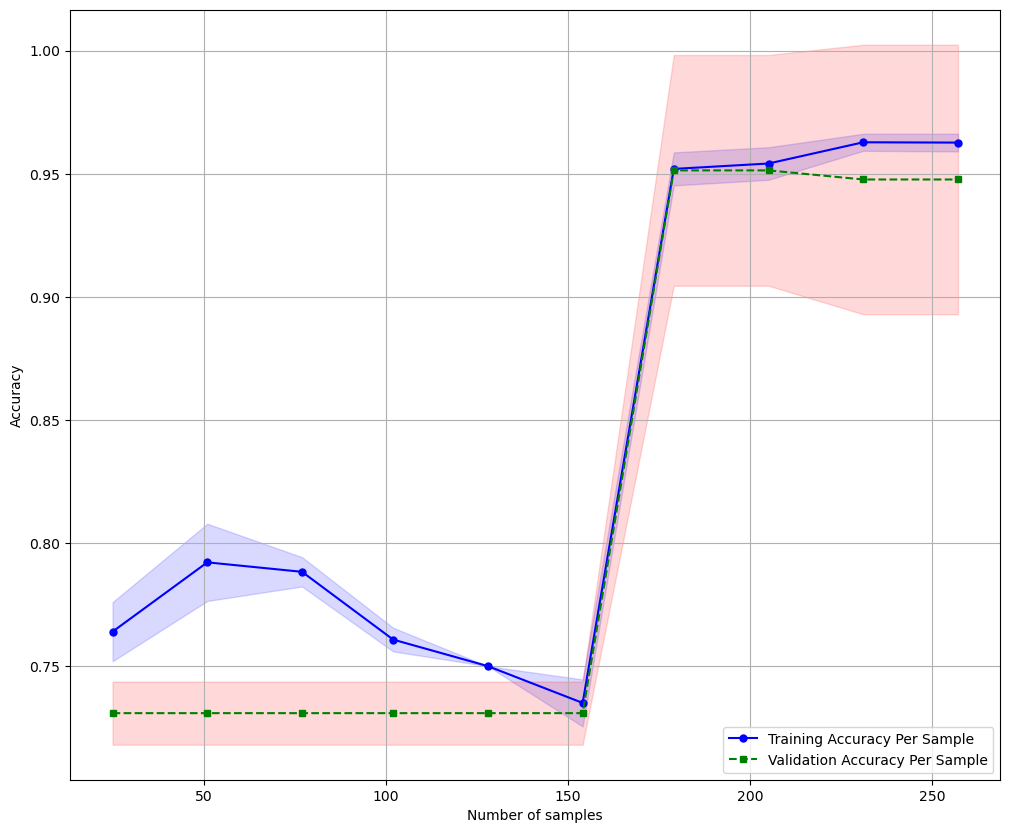

Confusion Matrix
[[ 55   9]
 [  4 103]]
Accuracy: 0.9240, Precision: 0.9196, Recall: 0.9626, F1: 0.9406, AUC: 0.9786


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)